<h1>Introduzing and analyzing the data</h1>

<b>Pixar Animation</b> is one of the most well known animation studios in the world and many people worldwide religiously watch every new released film. With hits like <a href='https://pt.wikipedia.org/wiki/Toy_Story'>Toy Story</a>, <a href='https://en.wikipedia.org/wiki/Finding_Nemo'>Finding Nemo</a>, <a href='https://en.wikipedia.org/wiki/Monsters,_Inc'>Monster's Inc</a>, and <a href='https://en.wikipedia.org/wiki/A_Bugs_Life'>A Bug's Life</a>, Pixar's movies are adored by kids for their charming characters and by adults for their wit. While Pixar has seen a lot of success, including a successful acquisition by <b>Disney</b>, not every one of their movies have been a hit. In this project, I'll explore the ups and downs of Pixar over the years primarily using data visualization. Data visualization is especially useful in this case since our sample size, only 15, is low and we can glean more general insights from exploring the data visually.

<a href='https://github.com/apalbright'>Alex Albright</a> has put together a dataset containing critics' ratings and opening weekend revenue for all of Pixar's movies, which you can find on <a href='https://github.com/apalbright/Pixar/blob/master/Pixar.csv'>her Github repo</a>. While this is a wonderful starting point, there's a lot more information available for each movie that we can add.

By scraping the data from <a href='http://www.boxofficemojo.com/franchises/chart/?view=main&id=pixar.htm&sort=date&order=ASC&p=.htm'>Box Office Mojo</a> and making some adjustments, it was able to put together <a href='https://www.dropbox.com/s/zi9ysyjqrg3ywsp/PixarMovies.csv?dl=0'>the following dataset</a>. The data is upto date as of November 2015 and doesn't contain the updated revenue numbers for Inside Out or any data on The Good Dinosaur.

Here are some of the columns in this dataset, PixarMovies.csv:

<b>Year Released</b> - the year the movie was released.
<br>
<b>Movie</b> - the name of the movie.
<br>
<b>RT Score</b> - the Rotten Tomatoes rating for the movie.
<br>
<b>IMDB Score</b> - the IMDB rating for the movie.
<br>
<b>Metacritic SCore</b> - the Metacritic rating for the movie.
<br>
<b>Opening Weekend</b> - the amount of revenue the movie made on opening weekend (in millions of dollars).
<br>
<b>Worldwide Gross</b> - the total amount of revenue the movie has made to date.
<br>
<b>Production Budget</b> - the amount of money spent to produce the film (in millions of dollars).
<br>
<b>Oscars Won</b> - the number of Oscar awards the movie won.
<br>
The data was added from these sources:

Box Office Mojo - www.boxofficemojo.com/
<br>
IMDB - www.imdb.com
<br>
Rotten Tomatoes - www.rottentomatoes.com
<br>
Metacritic - www.metacritic.com

In [13]:
import pandas as pd #for DataFrame
import matplotlib.pyplot as plt #for plotting base
import seaborn as sns #for compelling plots
%matplotlib inline

In [14]:
pixar_movies = pd.read_csv('PixarMovies.csv') #start reading the csv file
pixar_movies.shape #the pixar_movies DataFrame has 15 lines and 16 columns

(15, 16)

In [15]:
pixar_movies.head(15) #Showing the whole DataFrame

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


In [16]:
#It will generate summary statistics for all of the numeric columns.
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

In [17]:
pixar_movies.describe()

/dataquest/system/env/python3/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,NaN,NaN
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,NaN,NaN
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,NaN,NaN
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


You may have noticed the error above. That's because the column 'Oscars Nominated' and 'Oscars Won' for the movie Inside Out is unavailable, because, as I told you previously, this dataset is only upto date as of November 2015 and doesn't contain the Oscar nomations or results. For now, it will not influence in this project.

<h1>Data Cleaning</h1>

In [18]:
#Instead of using %, I will convert the following columns from object to float.
#Check below that the dtype of the columns was changed.
pixar_movies['Domestic %'] = pixar_movies['Domestic %'].str.rstrip('%').astype('float')
pixar_movies['International %'] = pixar_movies['International %'].str.rstrip('%').astype('float')
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                 float64
International %            float64
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

In [19]:
#Now, lets Multiply the "IMDB Score" column by 10 to convert it
#from a 10 point scale to a 100 point scale.

pixar_movies['IMDB Score'] = pixar_movies['IMDB Score'] * 10
pixar_movies

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
1,1998,A Bug's Life,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
2,1999,Toy Story 2,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
4,2003,Finding Nemo,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0
5,2004,The Incredibles,115,97,80.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0
6,2006,Cars,116,74,72.0,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0
7,2007,Ratatouille,111,96,80.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0
8,2008,WALL-E,97,96,84.0,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0
9,2009,Up,96,98,83.0,88,68.11,731.3,293.0,318.90,438.3,40.07,59.93,175,5.0,2.0


In [20]:
#At this part, I will disconsider the lines with NaN data
#in order to bring accurated data
filtered_pixar = pixar_movies.dropna()
#changing indexes
pixar_movies.set_index('Movie', inplace=True)
filtered_pixar.set_index('Movie', inplace=True)
pixar_movies

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
A Bug's Life,1998,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
Toy Story 2,1999,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
"Monsters, Inc.",2001,90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
Finding Nemo,2003,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0
The Incredibles,2004,115,97,80.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0
Cars,2006,116,74,72.0,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0
Ratatouille,2007,111,96,80.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0
WALL-E,2008,97,96,84.0,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0


<h1>Data Visualization</h1>
<br>
Now that the average reviews for each movie from the 3 major review sites are all on a 100 point scale, we can ask the question:
<br>
<br>
<b>How do the Pixar films fare across each of the major review sites?</b>

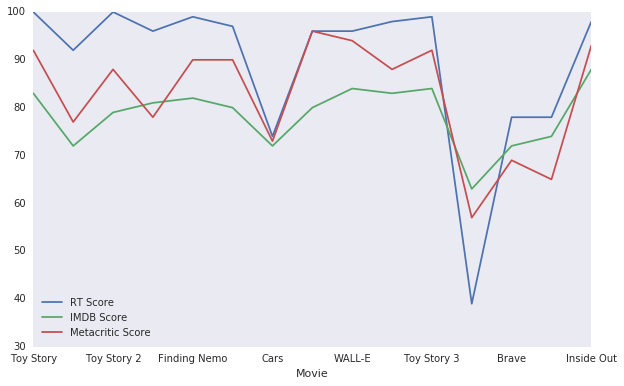

In [21]:
critics_review = pixar_movies[['RT Score','IMDB Score','Metacritic Score']]
critics_review.plot(figsize=(10,6),grid=False)
plt.show()

From the previous plot, it seems like the review site Rotten Tomatoes gives Pixar consistently higher ratings. Let's generate a box plot to explore the question:

<b>How are the average ratings from each review site across all the movies distributed?</b>

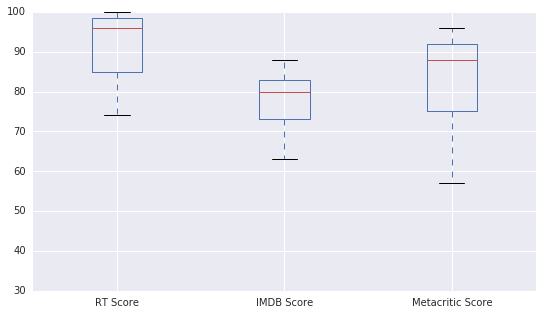

In [22]:
critics_review.plot(kind='box',figsize=(9,5))

From the box plot, it looks like our hunch that Rotten Tomatoes gave the Pixar movie consistently higher ratings seems to be true. It also looks like Metacritic's ratings for the Pixar movies are more spread out, ranging from right under 60 to right under 100.

The <b>Domestic %</b> and <b>International %</b> columns describe the percentage of the total revenue that was made in the United States and internationally, respectively. We can use those columns to explore these questions:
<br>

<b>How has the ratio of where the revenue comes from changed since the first movie? Now that Pixar is more well known internationally, is more revenue being made internationally for newer movies?</b>
<br>

To understand how the ratio has changed over the years, we can generate a stacked bar plot. A stacked bar plot is a type of bar plot where the values for each column are stacked on top of each other to better display the ratios. Stacked bar plots are especially useful when plotting proportional values that add upto 100% since it's easy to visually compare changes across bars.

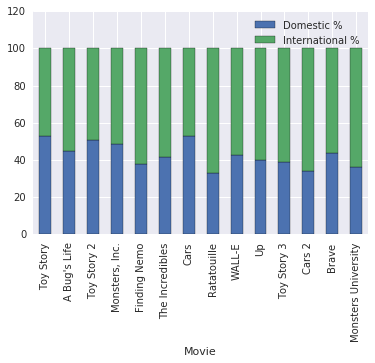

In [23]:
reveneu_proportions = filtered_pixar[['Domestic %','International %']]
reveneu_proportions.plot(kind='bar',stacked=True)

Spend some time visually exploring it. You'll notice that there's been a general decrease in the proportion of revenue that was made domestically.
While the first few movies were right around 50%, the last few movies have been hovering closer to 40%. A quick lookup of Inside Out on <a href='http://www.boxofficemojo.com/movies/?id=pixar2014.htm'>BoxOfficeMojo</a>  also suggests that this movie is around 40% (41.6% to be exact) right now.

Now, let's take a look at the influences that an Oscar Nomation or Win could make on a movie. Above, I created the oscar_data, which will contain just informations about nomations and wins.

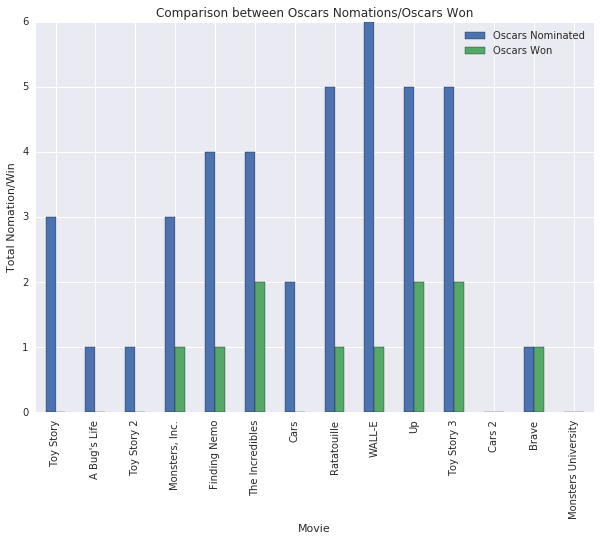

In [24]:
oscar_data = filtered_pixar[['Oscars Nominated','Oscars Won']]
oscar_data_plot = oscar_data.plot(kind='bar',figsize=(10,7)) #Creating bar plot
oscar_data_plot.set_xlabel('Movie') #setting x-axis label
oscar_data_plot.set_ylabel('Total Nomation/Win') #setting y-axis label
oscar_data_plot.set_title('Comparison between Oscars Nomations/Oscars Won') #Plot title

An interesting fact in this case is that "The Incredibles", "Up" and "Toy Story 3" got both two Oscars Awards. Although "WALL-E" was nominated six times, it just won one award; and "Monsters University", which had one of the biggest International Revenue, was not nominated to Oscar.

As we can see, the quantity of Oscars Nomations does not influence whether a movie will win an award or not. Finally, "Brave", for example, was nominated just once, but it won this prize.

<h1>Conclusion</h1>
<br>
I hope you have appreciated this study about Pixar's movies. My purpose in showing accurated data about Pixar's work along its existence is to make aware of the public expectation that grew around its movies.

As we can see - according to this dataset -, the public of Pixar  continues to grow, chiefly in another countries. With a movie launched per year, this company has brought good results for its stockholders, and an interesting point about this study is that movies such as "Cars 2" and "Brave" got a revenue slightly higher than "Monsters Inc.", released then years before. This is not a worrisome thing, due its next movies, like "Inside Out" and "The Good Dinossaur" has been made a huge revenue, which will ensure to Pixar be one of the best movie producers in the world for a long time.

Thank you.